In [1]:
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

In [98]:
import json
from pprint import pprint

with open('/Users/danielkershaw/Downloads/part-00002') as data_file:    
    data = json.load(data_file)
    
result_act = pd.read_json(data["result_act"]).sort_index()
result_user = pd.read_json(data["result_user"]).sort_index()

result_act_features = ["inffectedCommunitiesnor", "time_step_mean", "surface_mean"]

In [99]:
result_act['is_train'] = np.random.uniform(0, 1, len(result_act)) <= .75
train, test = result_act[result_act_features+["depth"]][result_act['is_train']==True], result_act[result_act['is_train']==False]

In [126]:
lm = LinearRegression(fit_intercept=False)

In [127]:
lm.fit(train[result_act_features], train["depth"])

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [128]:
print "Estimated intercept coefficent:", lm.intercept_
print "Number of coefficents:", len(lm.coef_)

Estimated intercept coefficent: 0.0
Number of coefficents: 3


In [129]:
pd.DataFrame(zip(train.columns, lm.coef_), columns=["features","estimatedCoefficent"])

,features,estimatedCoefficent
0,inffectedCommunitiesnor,59.965662
1,time_step_mean,-409.164450
2,surface_mean,0.073514


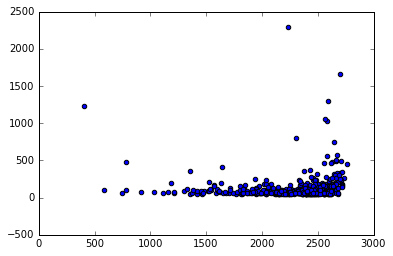

In [130]:
plt.scatter(result_act["surface_mean"],result_act["depth"])

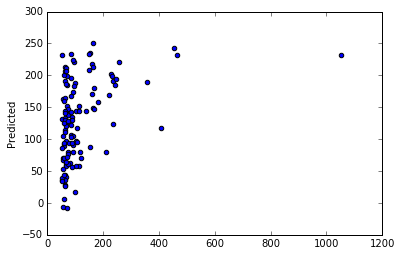

In [131]:
plt.scatter(test["depth"],lm.predict(test[result_act_features]))
plt.xlabel("")
plt.ylabel("Predicted")

In [132]:
mseFull = np.mean((test["depth"] - lm.predict(test[result_act_features])) **2 )
print mseFull

12057.2953532


In [133]:
import sklearn
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(result_act[result_act_features],result_act["depth"],test_size=0.33, random_state=5)

In [134]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [135]:
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [136]:
print "Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2)
print "Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2)

Fit a model X_train, and calculate MSE with Y_train: 23240.0403992
Fit a model X_train, and calculate MSE with X_test, Y_test: 32431.8096009


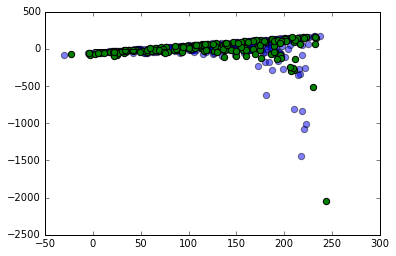

In [137]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin = 0, xmax = 50)